In [2]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re

In [6]:
# chargement et affichage des données
data = pd.read_csv('~/Downloads/personnes.csv')
display(data)

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [8]:
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [21]:
data.loc[~data['email'].isnull(), :]
data.loc[data['email'].duplicated(keep=False)]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [24]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne', 'USA']
mask = ~data['pays'].isin(VALID_COUNTRIES)
data.loc[mask, 'pays'] = np.NaN
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [25]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [37]:
"""
truc = data['taille'].str[:-1]
machin = pd.to_numeric(truc, errors='coerce')
m = round(machin.mean(),2)
data['taille'] = machin
"""
data.loc[data['taille'].isnull(), 'taille'] = data['taille'].mean()
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.490000
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.670000
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.841667
3,Marc,marco23@example.com,10/02/1978,France,1.650000
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.340000
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.450000
6,samuël,samuel_329@example.com,NaN,Bénin,1.450000


In [39]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'], format='%d/%m/%Y', errors='coerce')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.490000
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.670000
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.841667
3,Marc,marco23@example.com,1978-02-10,France,1.650000
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.340000
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,3.450000
6,samuël,samuel_329@example.com,NaT,Bénin,1.450000


In [40]:
ops = pd.read_csv('~/Downloads/operations.csv')
ops

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [43]:
missing = ops.isnull().sum()
missing

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [63]:
ops2 = ops.loc[~ops['montant'].isnull()]
ops2

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [64]:
ops2.reset_index()
mask = ops['categ'].isnull()
ops2.loc[mask, 'categ'] = 'FACTURE TELEPHONE'
ops2

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [65]:
missing = ops2.isnull().sum()
missing

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64

In [66]:
cats = ops2['categ'].unique()
cats.sort()
display(cats)
libs = ops2['libelle'].unique()
libs.sort()
display(libs)

array(['AUTRE', 'COTISATION BANCAIRE', 'COURSES', 'FACTURE TELEPHONE',
       'LOYER', 'RESTAURANT', 'TRANSPORT'], dtype=object)

array(['CARTE XX XX CHEZ LUC XX', "CARTE XX XX L'EPICERIE DEMBAS XX XX",
       'CARTE XX XX LA CCNCF XX', 'CARTE XX XX LA CCNCF XX XX',
       'CARTE XX XX LA LOUVE XX XX',
       'CARTE XX XX LES ANCIENS ROBINSON XX', 'CARTE XX XX RAPT XX',
       'CARTE XX XX TOUPTIPRI XX', 'CARTE XX XX VELOC XX XX',
       'CARTE XX XX XX XX', 'CARTE XX XX XX XX LA CCNCF XX',
       'CARTE XX XX XX XX XX', 'CARTE XX XX XX XX XX XX',
       'CARTE XX XX XX XX XX XX XX', 'CARTE XX XX XX XX XX XX XX XX',
       'CARTE XX XX XX XX XX XX XX XX XX XX', 'DON XX XX XX XX XX XX XX',
       'FORFAIT COMPTE SUPERBANK XX XX XX XX',
       'PRELEVEMENT XX TELEPHONE XX XX',
       'PRELEVEMENT XX XX XX XX XX XX XX XX', 'RETRAIT XX XX XX',
       'VIREMENT PERMANENT LOYER', 'VIREMENT XX XX XX XX XX XX',
       'VIREMENT XX XX XX XX XX XX XX',
       'VIREMENT XX XX XX XX XX XX XX XX XX',
       'VIREMENT XX XX XX XX XX XX XX XX XX XX',
       'VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX',
       'XX XX CARTE XX 

In [67]:
extract = ops2.loc[ops2['libelle'] == 'FACTURE TELEPHONE']
extract

,date_operation,libelle,montant,solde_avt_ope,categ


In [76]:
montants = pd.to_numeric(ops2['montant'], errors='coerce')
print('montants nuls après conversion :', montants.isnull().sum())
soldes = pd.to_numeric(ops2['solde_avt_ope'], errors='coerce')
print('soldes nuls après conversion :', soldes.isnull().sum())

montants nuls après conversion : 0
soldes nuls après conversion : 0


In [79]:
dates = pd.to_datetime(ops2['date_operation'], format='%Y-%m-%d', errors='coerce')
print('dates nulles après conversion :', dates.isnull().sum())

dates nulles après conversion : 0


In [91]:
agreg = ops2['date_operation'] + ops2['libelle'] + ops2['montant'].to_string() + ops2['solde_avt_ope'].to_string() + ops2['categ']
display(agreg)
dedoub = agreg.unique()
print('nb unique:', len(dedoub))

0      2023-03-31DON XX XX XX XX XX XX XX0         -1...
1      2023-04-03CARTE XX XX RAPT XX0         -1.44\n...
2      2023-04-03CARTE XX XX RAPT XX0         -1.44\n...
3      2023-04-03VIREMENT XX XX XX XX XX XX XX XX XX ...
4      2023-04-03VIREMENT XX XX XX XX XX XX0         ...
                             ...                        
304    2023-10-05CARTE XX XX XX XX XX XX0         -1....
305    2023-10-05CARTE XX XX XX XX0         -1.44\n1 ...
306    2023-10-06FORFAIT COMPTE SUPERBANK XX XX XX XX...
307    2023-10-06CARTE XX XX CHEZ LUC XX0         -1....
308    2023-10-06PRELEVEMENT XX TELEPHONE XX XX0     ...
Length: 307, dtype: object

nb unique: 259


In [94]:
ops2.shape

(307, 5)

In [98]:
ops2.loc['date_operation'] = pd.to_datetime(ops2['date_operation'])
ops2.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                   object
solde_avt_ope             object
categ                     object
dtype: object

In [101]:
ops.loc[ops[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:] # détection


,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [103]:
ops.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

In [104]:
ops.describe()

,montant,solde_avt_ope
count,306.000000,308.000000
mean,-45.955163,3395.301071
std,875.672284,667.109412
min,-15000.000000,1416.810000
25%,-20.282500,3010.737500
50%,-9.600000,3452.465000
75%,-2.705000,3787.232500
max,1071.600000,4709.310000


In [107]:
i = ops.loc[ops['montant'] == -15000,:].index[0] # récupération de l'index de la transaction à -15000
ops.iloc[i-1:i+2,:] # on regarde la transaction précédente et la suivante

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [109]:
ops.loc[ops['montant']==-15000, 'montant'] = -14.39

Quizz

In [142]:
data = pd.read_csv('~/Downloads/course+-+Quiz+P2.csv')
data

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0
4,5,M,00:33:29,76,779609,26.0
5,6,M,00:33:34,76,779614,22.0
6,7,M,00:33:39,76,779619,34.0
7,8,M,00:33:41,27,779621,37.0
8,9,M,00:33:44,76,779624,25.0
9,10,M,00:34:16,76,779656,48.0


In [111]:
data.shape

(340, 6)

In [112]:
data.dtypes

Position            int64
Sexe               object
Temps              object
Dept                int64
Temps_secondes      int64
Age               float64
dtype: object

In [114]:
# Q1 : modalité hors liste [76, 27, 14] (erreur lexicale)
display(data['Dept'].unique())

array([76, 27, 14, 78], dtype=int64)

In [115]:
# Q2 : valeurs manquantes
data.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64

In [141]:
# Q3 : convertion des temps en datetimes et valeur manquante
td = pd.to_timedelta(data['Temps_secondes'])
print(td)

0     0 days 00:00:00.000779543
1     0 days 00:00:00.000779560
2     0 days 00:00:00.000779595
3     0 days 00:00:00.000779603
4     0 days 00:00:00.000779609
5     0 days 00:00:00.000779614
6     0 days 00:00:00.000779619
7     0 days 00:00:00.000779621
8     0 days 00:00:00.000779624
9     0 days 00:00:00.000779656
10    0 days 00:00:00.000779660
11    0 days 00:00:00.000779663
12    0 days 00:00:00.000779669
13    0 days 00:00:00.000779670
14    0 days 00:00:00.000779685
15    0 days 00:00:00.000779705
16    0 days 00:00:00.000779712
17    0 days 00:00:00.000779757
18    0 days 00:00:00.000779772
19    0 days 00:00:00.000779775
20    0 days 00:00:00.000779780
21    0 days 00:00:00.000779782
22    0 days 00:00:00.000779783
23    0 days 00:00:00.000779795
24    0 days 00:00:00.000779802
25    0 days 00:00:00.000779811
26    0 days 00:00:00.000779812
27    0 days 00:00:00.000779824
28    0 days 00:00:00.000779827
29    0 days 00:00:00.000779827
30    0 days 00:00:00.000779828
31    0 

In [140]:
# quelle valeur est aberrante ? NaT - ne marche pas : vu que c'est une erreur d'irrégularité ligne 250
pd.set_option('display.max_rows', None)

In [143]:
# Q4 : outliers Position, Age et Temps_secondes
data.describe()

,Position,Dept,Temps_secondes,Age
count,340.000000,340.000000,340.000000,336.000000
mean,177.061765,56.991176,780553.123529,42.145833
std,166.584054,25.059279,514.526264,13.963690
min,-100.000000,14.000000,779543.000000,18.000000
25%,85.750000,27.000000,780200.500000,34.000000
50%,170.500000,76.000000,780536.500000,41.500000
75%,255.250000,76.000000,780906.500000,49.250000
max,2640.000000,78.000000,781831.000000,174.000000


In [146]:
mask_age = data['Age'] == 174
display(data.loc[mask_age])
mask_pos = (data['Position'] < 1) | (data['Position'] > 340)
display(data.loc[mask_pos])

,Position,Sexe,Temps,Dept,Temps_secondes,Age
302,303,M,01:00:04,76,781204,174.0


,Position,Sexe,Temps,Dept,Temps_secondes,Age
43,-100,M,00:39:39,27,779979,31.0
264,2640,M,00:56:21,76,780981,51.0


In [148]:
# Q5 : doublons
display(data.loc[data[['Position', 'Temps_secondes']].duplicated(keep=False),:]) # détection
display(data.loc[data[['Position']].duplicated(keep=False),:]) # détection
display(data.loc[data[['Temps_secondes']].duplicated(keep=False),:]) # détection
# lignes 257 et 258 suspectes, mes les positions indiquées sont distinctes

,Position,Sexe,Temps,Dept,Temps_secondes,Age


,Position,Sexe,Temps,Dept,Temps_secondes,Age


,Position,Sexe,Temps,Dept,Temps_secondes,Age
28,29,M,00:37:07,76,779827,31.0
29,30,M,00:37:07,76,779827,25.0
57,58,M,00:40:41,76,780041,65.0
58,59,M,00:40:41,27,780041,42.0
62,63,M,00:41:13,76,780073,53.0
63,64,M,00:41:13,76,780073,28.0
75,76,M,00:42:19,76,780139,48.0
76,77,M,00:42:19,76,780139,66.0
106,107,M,00:44:29,76,780269,23.0
107,108,M,00:44:29,76,780269,48.0


In [149]:
# Q6 : erreur cachée
data['Sexe'].unique()

array(['M', 'F', 'O', nan], dtype=object)

In [152]:
pd.set_option('display.max_rows', 15)
data

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0
4,5,M,00:33:29,76,779609,26.0
...,...,...,...,...,...,...
335,336,F,01:08:34,27,781714,41.0
336,337,F,01:08:36,27,781716,48.0
337,338,M,01:09:31,27,781771,24.0
338,339,F,01:09:31,27,781771,25.0


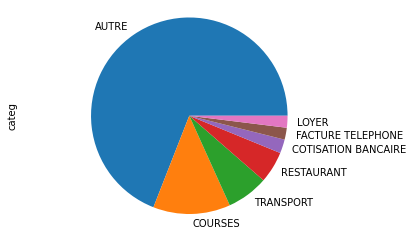

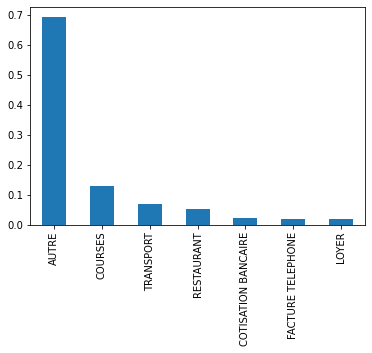

In [161]:
import matplotlib.pyplot as plt
ops['categ'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.show()
ops['categ'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [163]:
ops['quart_mois'] = [int((jour-1)*4/31)+1 for jour in ops["date_operation"].dt.day]

AttributeError: Can only use .dt accessor with datetimelike values